<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/CV512077-NN_integer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
ints = np.hstack( (np.arange(6), np.arange(7,10)) )  # skip 6
ints = np.hstack( (ints,) * 10)  # for balance...skl.mlp doesn't have class_weights
other = np.random.random(100)*10
X = np.hstack((ints, other))[:, np.newaxis]
y = np.array([1]*len(ints) + [0]*len(other))
w = np.array([len(other)/len(ints)]*len(ints) + [1]*len(other))


In [ ]:
ints

array([0, 1, 2, 3, 4, 5, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7,
       8, 9])

In [ ]:
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, w, stratify=y, test_size=0.1)


In [ ]:
mlp = Pipeline([('scale', StandardScaler()), ('mlp', MLPClassifier((40, 15), solver='lbfgs', max_iter=10000, tol=0.00001, learning_rate_init=0.0001))])
mlp.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(40, 15),
                               learning_rate='constant',
                               learning_rate_init=0.0001, max_fun=15000,
                               max_iter=10000, momentum=0.9,
                               n_iter_no_change=10, nesterovs_momentum=True,
                               power_t=0.5, random_state=None, shuffle=True,
                               solver='lbfgs', tol=1e-05,
                               validation_fraction=0.1, verbose=False,
                               warm_start=False))],
         verbose=False)

In [ ]:
mlp.score(X_train, y_train)

0.7953216374269005

In [ ]:
mlp.score(X_test, y_test)

0.6842105263157895

In [ ]:
y_test

array([1, 0, 0, 0, 0, 0])

In [ ]:
mlp.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0])

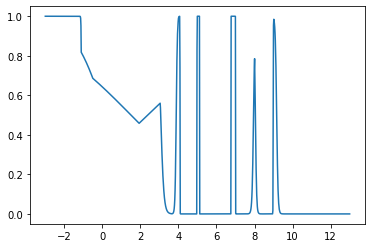

In [ ]:
from matplotlib import pyplot as plt
xx = np.linspace(-3, 13, num=1000)
yy = mlp.predict_proba(xx[:, np.newaxis])[:, 1]
plt.plot(xx, yy)